<a href="https://colab.research.google.com/github/Jieunlee-svg/dataanalysis_/blob/main/%EC%84%A4%EB%AC%B8%EC%A1%B0%EC%82%AC_%EA%B2%B0%EA%B3%BC_%EB%B6%84%EC%84%9D_%EC%9D%91%EB%8B%B5_%EB%B6%84%ED%8F%AC_%EB%8F%84%EB%84%9B_%EA%B7%B8%EB%9E%98%ED%94%84_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# 파일 업로드
from google.colab import files
uploaded = files.upload()

# 엑셀 불러오기
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

Saving poll_answer2.xlsx to poll_answer2 (6).xlsx


In [16]:
# Q1_TEXT 응답별 개수
q1_counts = df['Q1(TEXT)'].value_counts(dropna=False)

# 확인
print(q1_counts)

Q1(TEXT)
가족의 건강 정보를 알고 싶어요. (공유받는 사람)       308
내 건강 정보를 가족과 나누고 싶어요. (공유하는 사람)    131
Name: count, dtype: int64


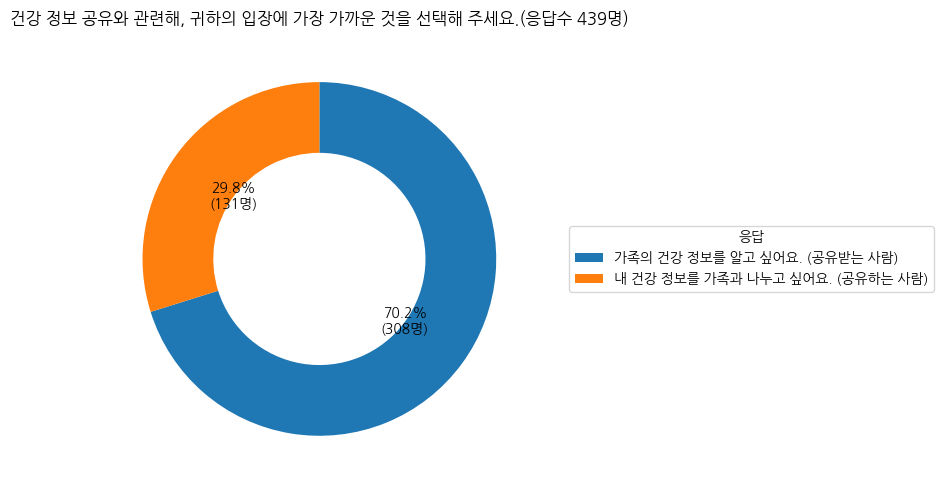

In [52]:
import matplotlib.pyplot as plt

# 응답 수 확인
q1_counts = df['Q1(TEXT)'].value_counts(dropna=False)

# 자동 텍스트 생성 함수: 퍼센트 + 개수 같이 표시
def autopct_format(pct, allvals):
    count = int(round(pct/100.*sum(allvals)))
    return f'{pct:.1f}%\n({count}명)'

# 도넛 차트
fig, ax = plt.subplots(figsize=(10, 5))
wedges, texts, autotexts = ax.pie(
    q1_counts.values,
    labels=None,
    startangle=90,
    counterclock=False,
    wedgeprops=dict(width=0.4),
    autopct=lambda pct: autopct_format(pct, q1_counts.values)
)

# 범례 따로
legend = ax.legend(
    wedges,
    q1_counts.index,
    title="응답",
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    fontsize=10
)
legend.get_title().set_ha('left')

plt.title('건강 정보 공유와 관련해, 귀하의 입장에 가장 가까운 것을 선택해 주세요.(응답수 439명)',loc='center', pad=10)
plt.tight_layout()
plt.show()

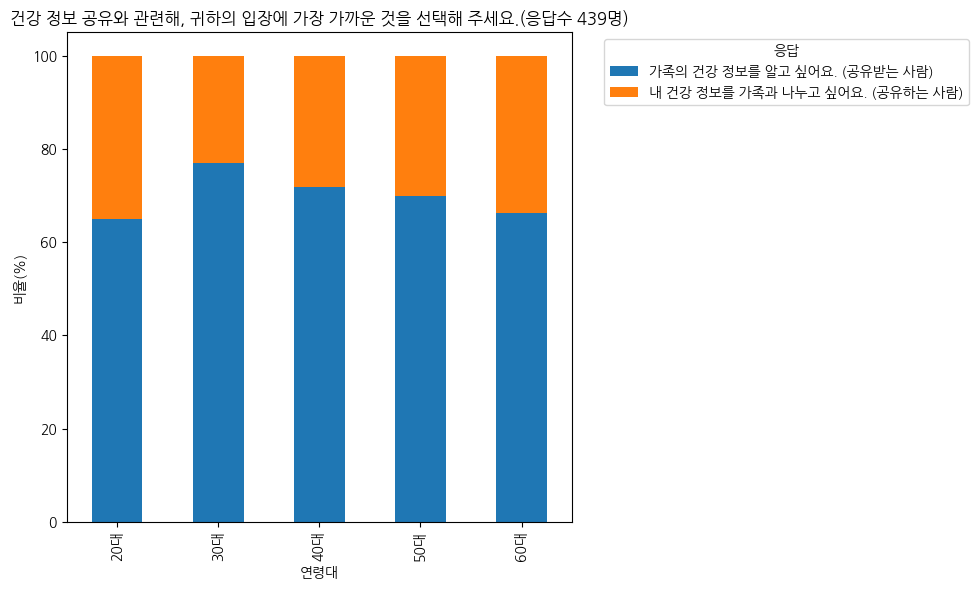

In [54]:
# 교차표 생성: Q1(TEXT) × AGE_2
df_valid = df[df['Q1(TEXT)'].notna()]
ct = pd.crosstab(index=df_valid['AGE_2'], columns=df_valid['Q1(TEXT)'], normalize='index') * 100

# 정렬된 응답 항목 순서 (원하시면 직접 지정 가능)
q1_order = ct.columns.tolist()

# 시각화
ct[q1_order].plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('건강 정보 공유와 관련해, 귀하의 입장에 가장 가까운 것을 선택해 주세요.(응답수 439명)')
plt.ylabel('비율(%)')
plt.xlabel('연령대')
plt.legend(title='응답', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()